In [2]:
#imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#reading the csv file
dir  = globals()['_dh'][0].parent
file_path = dir / 'data' / 'cleaned_data.pkl'
df = pd.read_pickle(file_path)
print(df.shape)
df.head(5)


(16680, 16)


,OrgID,EnrollDate,ChurnDate,OrgSize,Industry,IndustryGroup,Enrollment Plan,PromoType,Acquisition Channel,F28 Active Rate,Avg Lifetime Active,F28 Cc Flag,eLTV/CAC,Churned,Enrollment Duration,User_id
0,44,2021-02-01,NaT,0-1,Flooring,Other,Extra large,No Promo,Marketing - Paid,0.607,0.096,0,4.1,0,676.0,4420210201
1,70,2022-03-01,NaT,0-1,Plumbing,Plumbing,Starter,No Promo,NaN,0.071,0.340,0,1.2,0,283.0,7020220301
2,1494,2020-10-02,NaT,0-1,Carpet Cleaning,Carpet Cleaning,Small,No Promo,Product,1.000,0.379,1,3.4,0,798.0,149420201002
3,1604,2020-10-08,2020-12-08,11+,Restoration,Other,Large,2+ month,Sales,0.500,0.004,0,6.2,1,61.0,160420201008
4,1652,2020-02-03,2020-03-02,11+,Solar & Energy,Other,Large,One Month,Sales,0.000,0.001,0,4.7,1,28.0,165220200203


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   OrgID                16680 non-null  int64         
 1   EnrollDate           16680 non-null  datetime64[ns]
 2   ChurnDate            6703 non-null   datetime64[ns]
 3   OrgSize              16671 non-null  category      
 4   Industry             16655 non-null  object        
 5   IndustryGroup        16680 non-null  object        
 6   Enrollment Plan      16677 non-null  category      
 7   PromoType            16680 non-null  category      
 8   Acquisition Channel  15947 non-null  object        
 9   F28 Active Rate      16680 non-null  float64       
 10  Avg Lifetime Active  16680 non-null  float64       
 11  F28 Cc Flag          16680 non-null  int64         
 12  eLTV/CAC             16549 non-null  float64       
 13  Churned              16680 non-

## 1 - Analysing from Pomotion Type
Findings: \
1 - One month promo have a large churn rate in comparisson the others, also have the least active rate, enrollment duration and ltv/cac \
2 - One month promos have the largest client acquisition pool, but further investigation is needed to know if this is due to promo atraction or simply by more investment done in these campaigns \
3 - 2+ month promos have the largest ltv/cac rate, least churn rate, most active rate and has overall a larger company size and greater plan \
4 - 2+ month and special promos attract larger organizations in greater plans \
5 - 2+ month promos tend to funcion better through marketing instead of sales, the others are more balanced \
6 - Financial impact is still greater for the One month promos mainly because of the quantity of users, in second is the 2+month promos with a lot less users but not far off contribution. Focusing more in this profile can increase venue and profit \
7 - Increase of Carpet Cleaning and Heating for 2+ month promos

\
About the data:\
1 - How can we know if the estimated LTV was achieved? \
2 - How is the LTV calculated? \
3 - How is the CAC calculated? Is it the same for everyone? \
4 - Can we have LTV and CAC separated?

In [5]:
#percentual of churned users
churn_perc = df[df['ChurnDate'].notnull()]['ChurnDate'].count() / len(df) * 100
churn_perc

40.18585131894484

In [6]:
#percentual of users for each promo type
df_promo = pd.DataFrame()
df_promo['users'] = df.groupby('PromoType')['PromoType'].count()
df_promo['users_perc'] = df.groupby('PromoType')['PromoType'].count() / len(df)

#percentual of churned users for each promo type 
df_promo['churned_users'] = df[df['ChurnDate'].notnull()].groupby('PromoType')['PromoType'].count()
df_promo['churned_users_perc'] = (df_promo['churned_users'] / df_promo['users'])

#share of churned users regarding all churned users for each promo type
df_promo['share_of_churned_users'] = df_promo['churned_users'] / df[df['ChurnDate'].notnull()]['ChurnDate'].count()

#average duration of enrollment for each promo type
df_promo['avg_duration'] = df.groupby('PromoType')['Enrollment Duration'].mean()

#average F28 Active Rate for each promo type
df_promo['avg_F28_Active_Rate'] = df.groupby('PromoType')['F28 Active Rate'].mean()

#average Avg Lifetime Active for each promo type
df_promo['avg_Avg_Lifetime_Active'] = df.groupby('PromoType')['Avg Lifetime Active'].mean()

#avg ltv/cac for each promo type
df_promo['avg_ltv_cac'] = df.groupby('PromoType')['eLTV/CAC'].mean()

#avg financial impact for each promo type
df_promo['avg_financial_impact'] = (df_promo['users'] - df_promo['churned_users']) * df_promo['avg_ltv_cac']

#most predominant OrgSize for each promo type
df_promo['most_predominant_OrgSize'] = df.groupby('PromoType')['OrgSize'].agg(lambda x:x.value_counts().index[0])

#most predominant Enrollment Plan for each promo type
df_promo['most_predominant_Enrollment_Plan'] = df.groupby('PromoType')['Enrollment Plan'].agg(lambda x:x.value_counts().index[0])

#most predominant Industry for each promo type
df_promo['most_predominant_Industry'] = df.groupby('PromoType')['Industry'].agg(lambda x:x.value_counts().index[0])

#most predominant Industry Group for each promo type
df_promo['most_predominant_Industry_Group'] = df.groupby('PromoType')['IndustryGroup'].agg(lambda x:x.value_counts().index[0])

#most_predominant Acquisition Channel for each promo type
df_promo['most_predominant_Acquisition_Channel'] = df.groupby('PromoType')['Acquisition Channel'].agg(lambda x:x.value_counts().index[0])

df_promo.head()


,users,users_perc,churned_users,churned_users_perc,share_of_churned_users,avg_duration,avg_F28_Active_Rate,avg_Avg_Lifetime_Active,avg_ltv_cac,avg_financial_impact,most_predominant_OrgSize,most_predominant_Enrollment_Plan,most_predominant_Industry,most_predominant_Industry_Group,most_predominant_Acquisition_Channel
PromoType,,,,,,,,,,,,,,,
No Promo,3659,0.219365,1051,0.287237,0.156795,442.841213,0.348839,0.293333,2.769978,7224.102587,0-1,Starter,Heating & Air Conditioning,Other,Marketing - Unpaid
One Month,10225,0.613010,4842,0.473545,0.722363,331.701125,0.242591,0.202049,2.157975,11616.377185,0-1,Small,Heating & Air Conditioning,Other,Sales
Special - One Month,1559,0.093465,514,0.329699,0.076682,378.563182,0.322368,0.303901,7.598636,7940.575000,2-6,Large,Heating & Air Conditioning,Other,Sales
2+ month,1237,0.074161,296,0.239289,0.044159,459.842361,0.375766,0.411003,9.603922,9037.290196,2-6,Large,Heating & Air Conditioning,Heating & Air Conditioning,Marketing - Unpaid


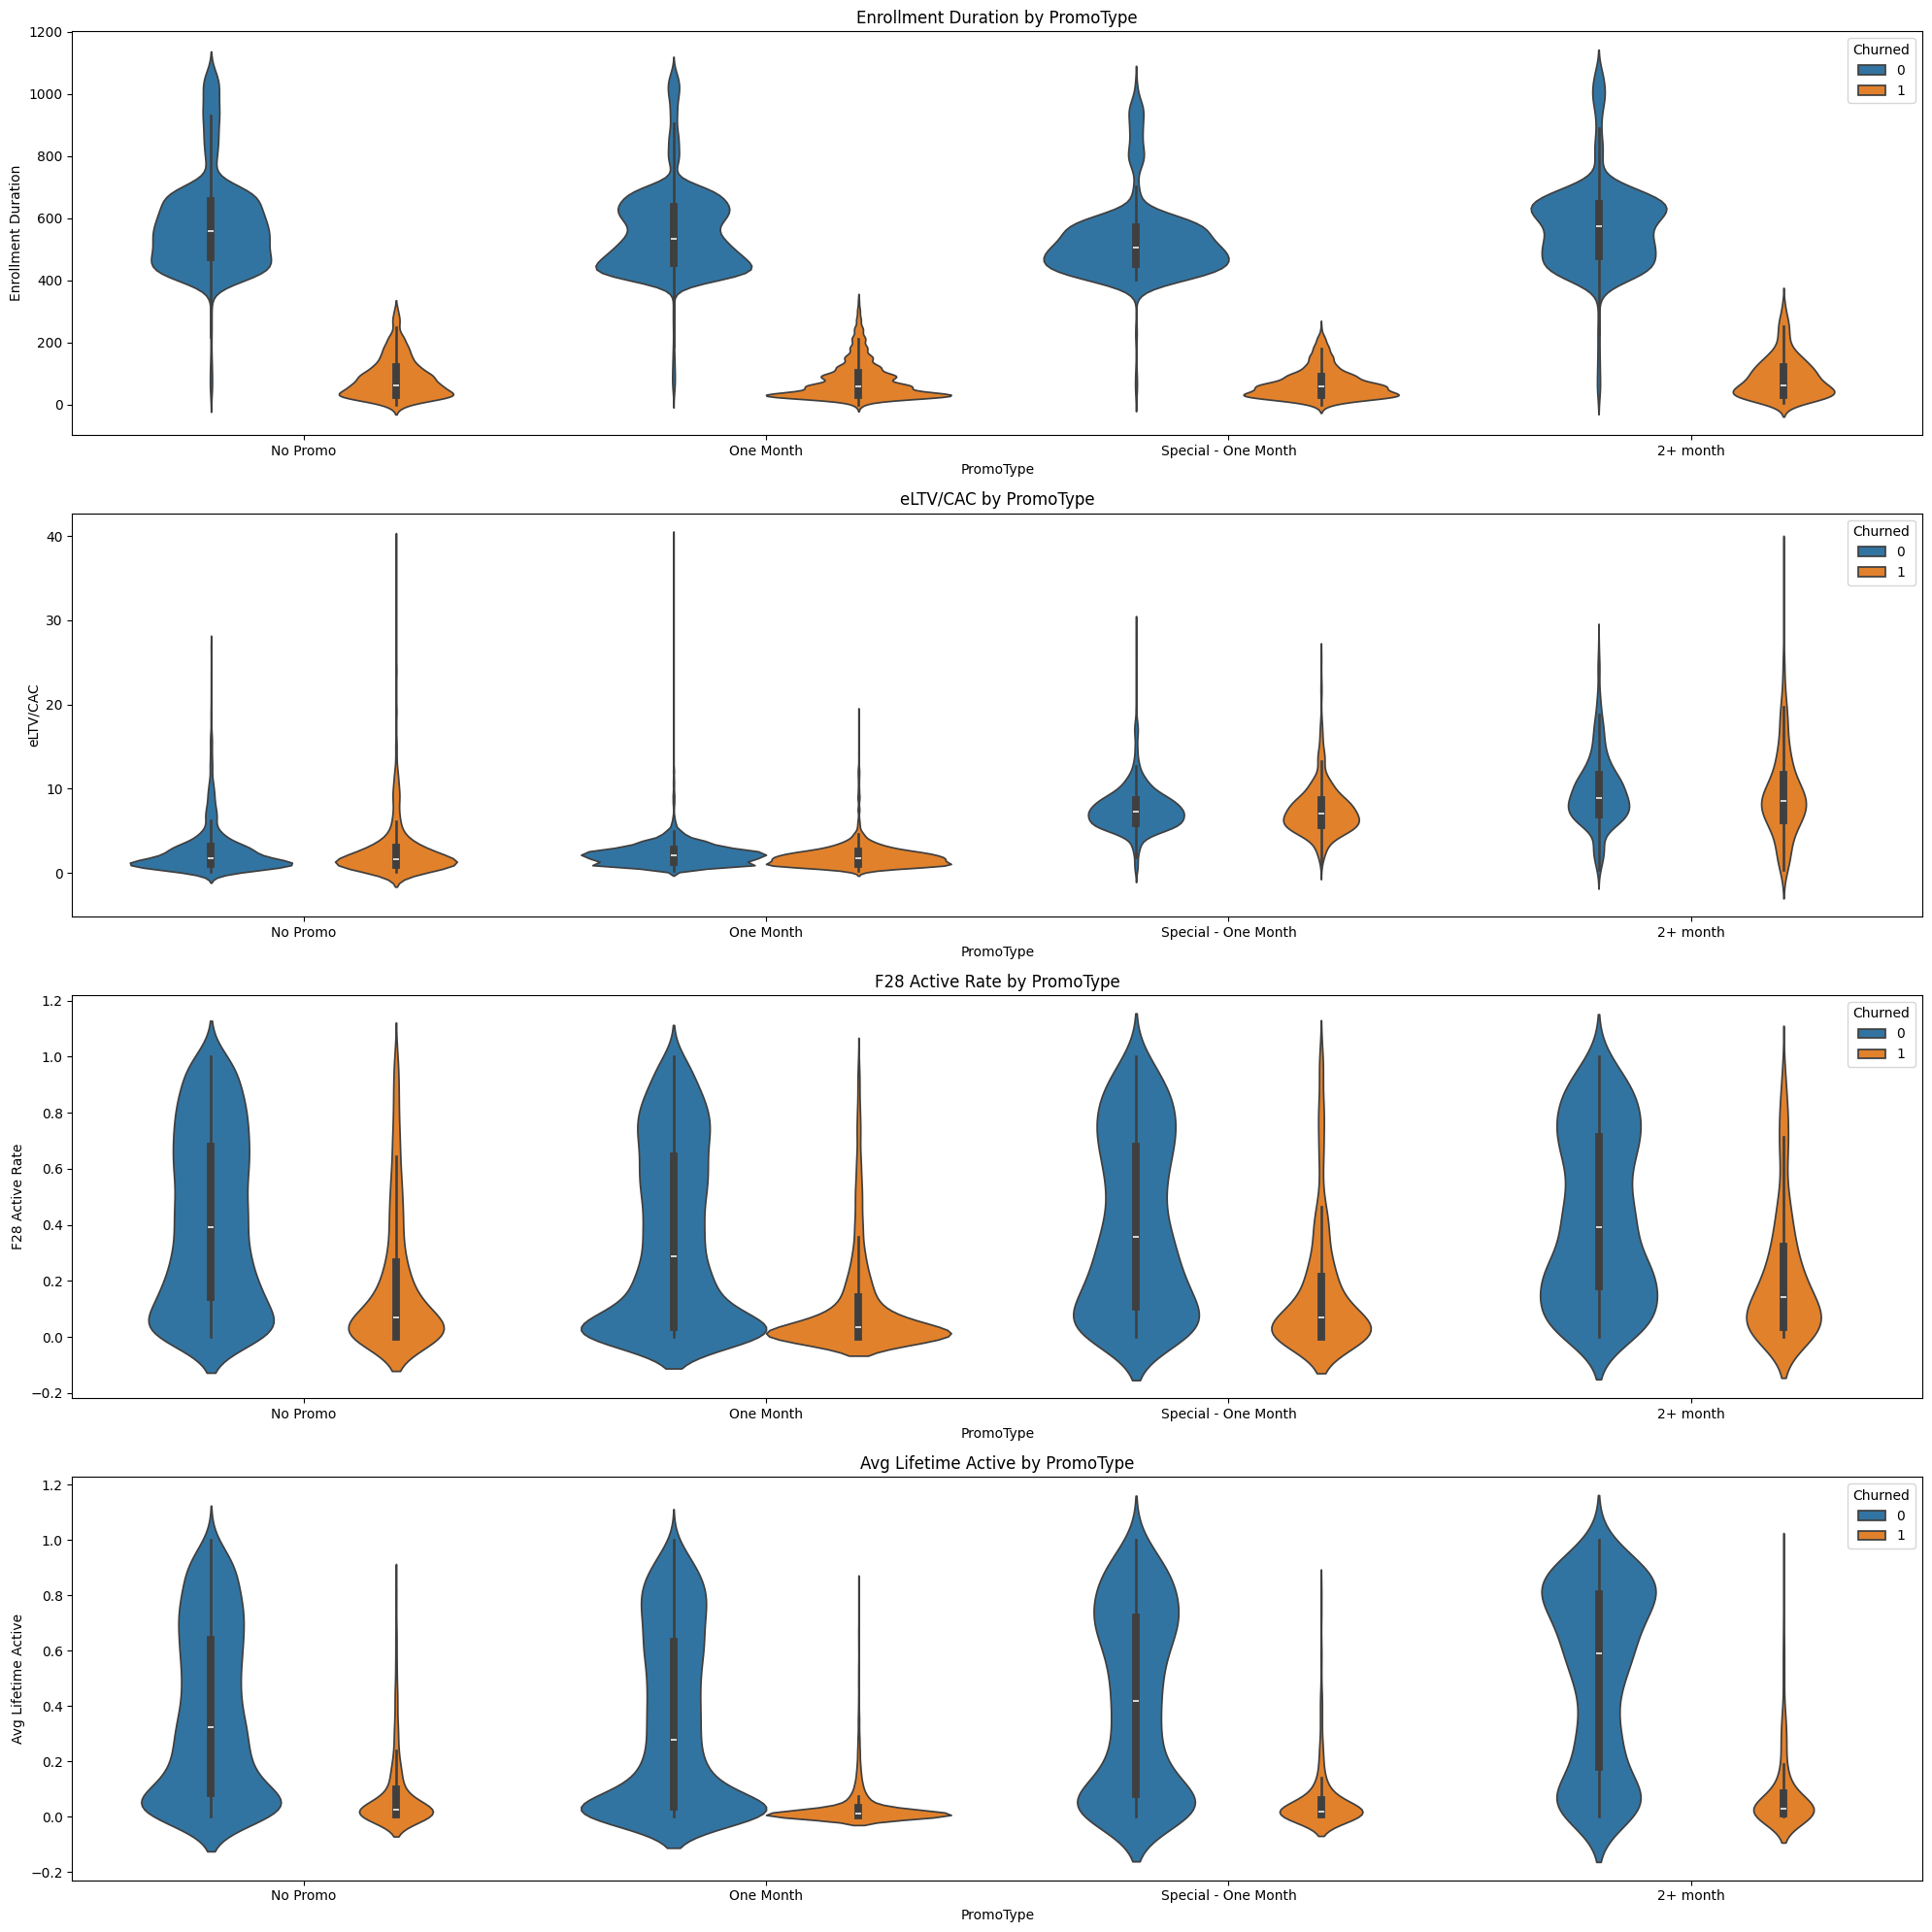

In [7]:
#violin plot for the promotion type
fig, axs = plt.subplots(4,1, figsize=(20, 20))

sns.violinplot(x='PromoType', y='Enrollment Duration', data=df, ax=axs[0], hue="Churned")
axs[0].set_title('Enrollment Duration by PromoType')  # Set title for the first subplot

sns.violinplot(x='PromoType', y='eLTV/CAC', data=df, ax=axs[1], hue="Churned")
axs[1].set_title('eLTV/CAC by PromoType')  # Set title for the second subplot

sns.violinplot(x='PromoType', y='F28 Active Rate', data=df, ax=axs[2], hue="Churned")
axs[2].set_title('F28 Active Rate by PromoType')  # Set title for the third subplot

sns.violinplot(x='PromoType', y='Avg Lifetime Active', data=df, ax=axs[3], hue="Churned")
axs[3].set_title('Avg Lifetime Active by PromoType')  # Set title for the fourth subplot


plt.tight_layout()
plt.show()

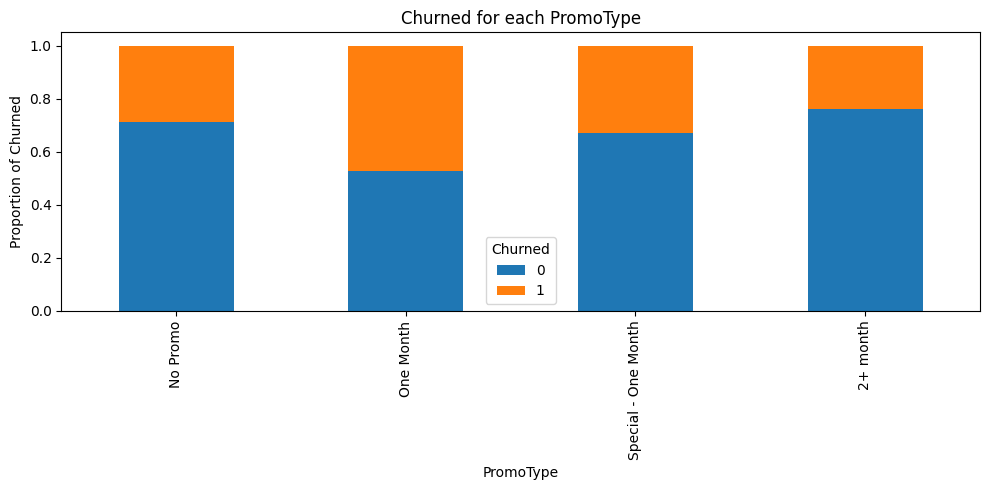

In [17]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Group by PromoType and Churned, count occurrences, and unstack for plotting
grouped = df[df['Churned'].notnull()].groupby(['PromoType', 'Churned']).size().unstack()

# Normalize the data to show proportions (optional)
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('Churned for each PromoType')
ax.set_ylabel('Proportion of Churned')  # Change to 'Count' if not normalizing
ax.set_xlabel('PromoType')

# Display the plot
plt.tight_layout()
plt.show()

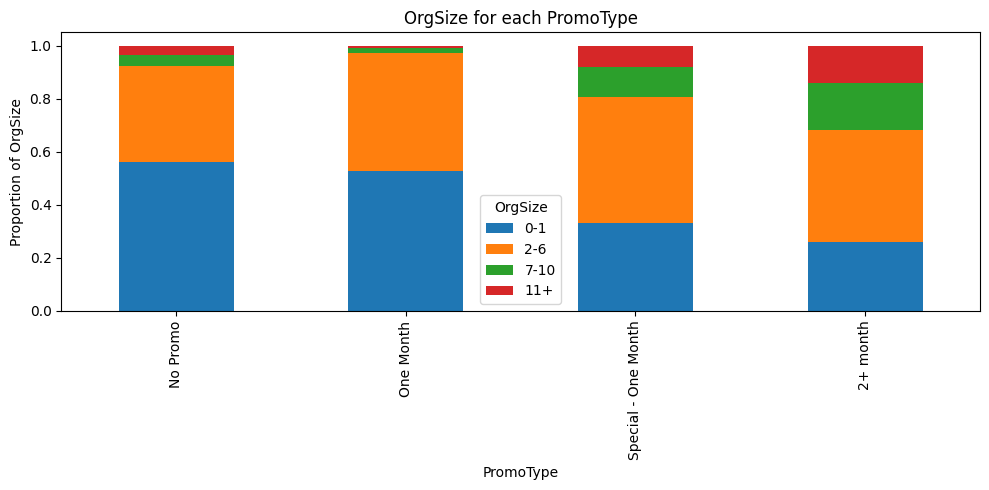

In [9]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Group by PromoType and OrgSize, count occurrences, and unstack for plotting
grouped = df[df['OrgSize'].notnull()].groupby(['PromoType', 'OrgSize']).size().unstack()

# Normalize the data to show proportions (optional)
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('OrgSize for each PromoType')
ax.set_ylabel('Proportion of OrgSize')  # Change to 'Count' if not normalizing
ax.set_xlabel('PromoType')

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\gfmar\AppData\Local\Temp\ipykernel_18280\242057030.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


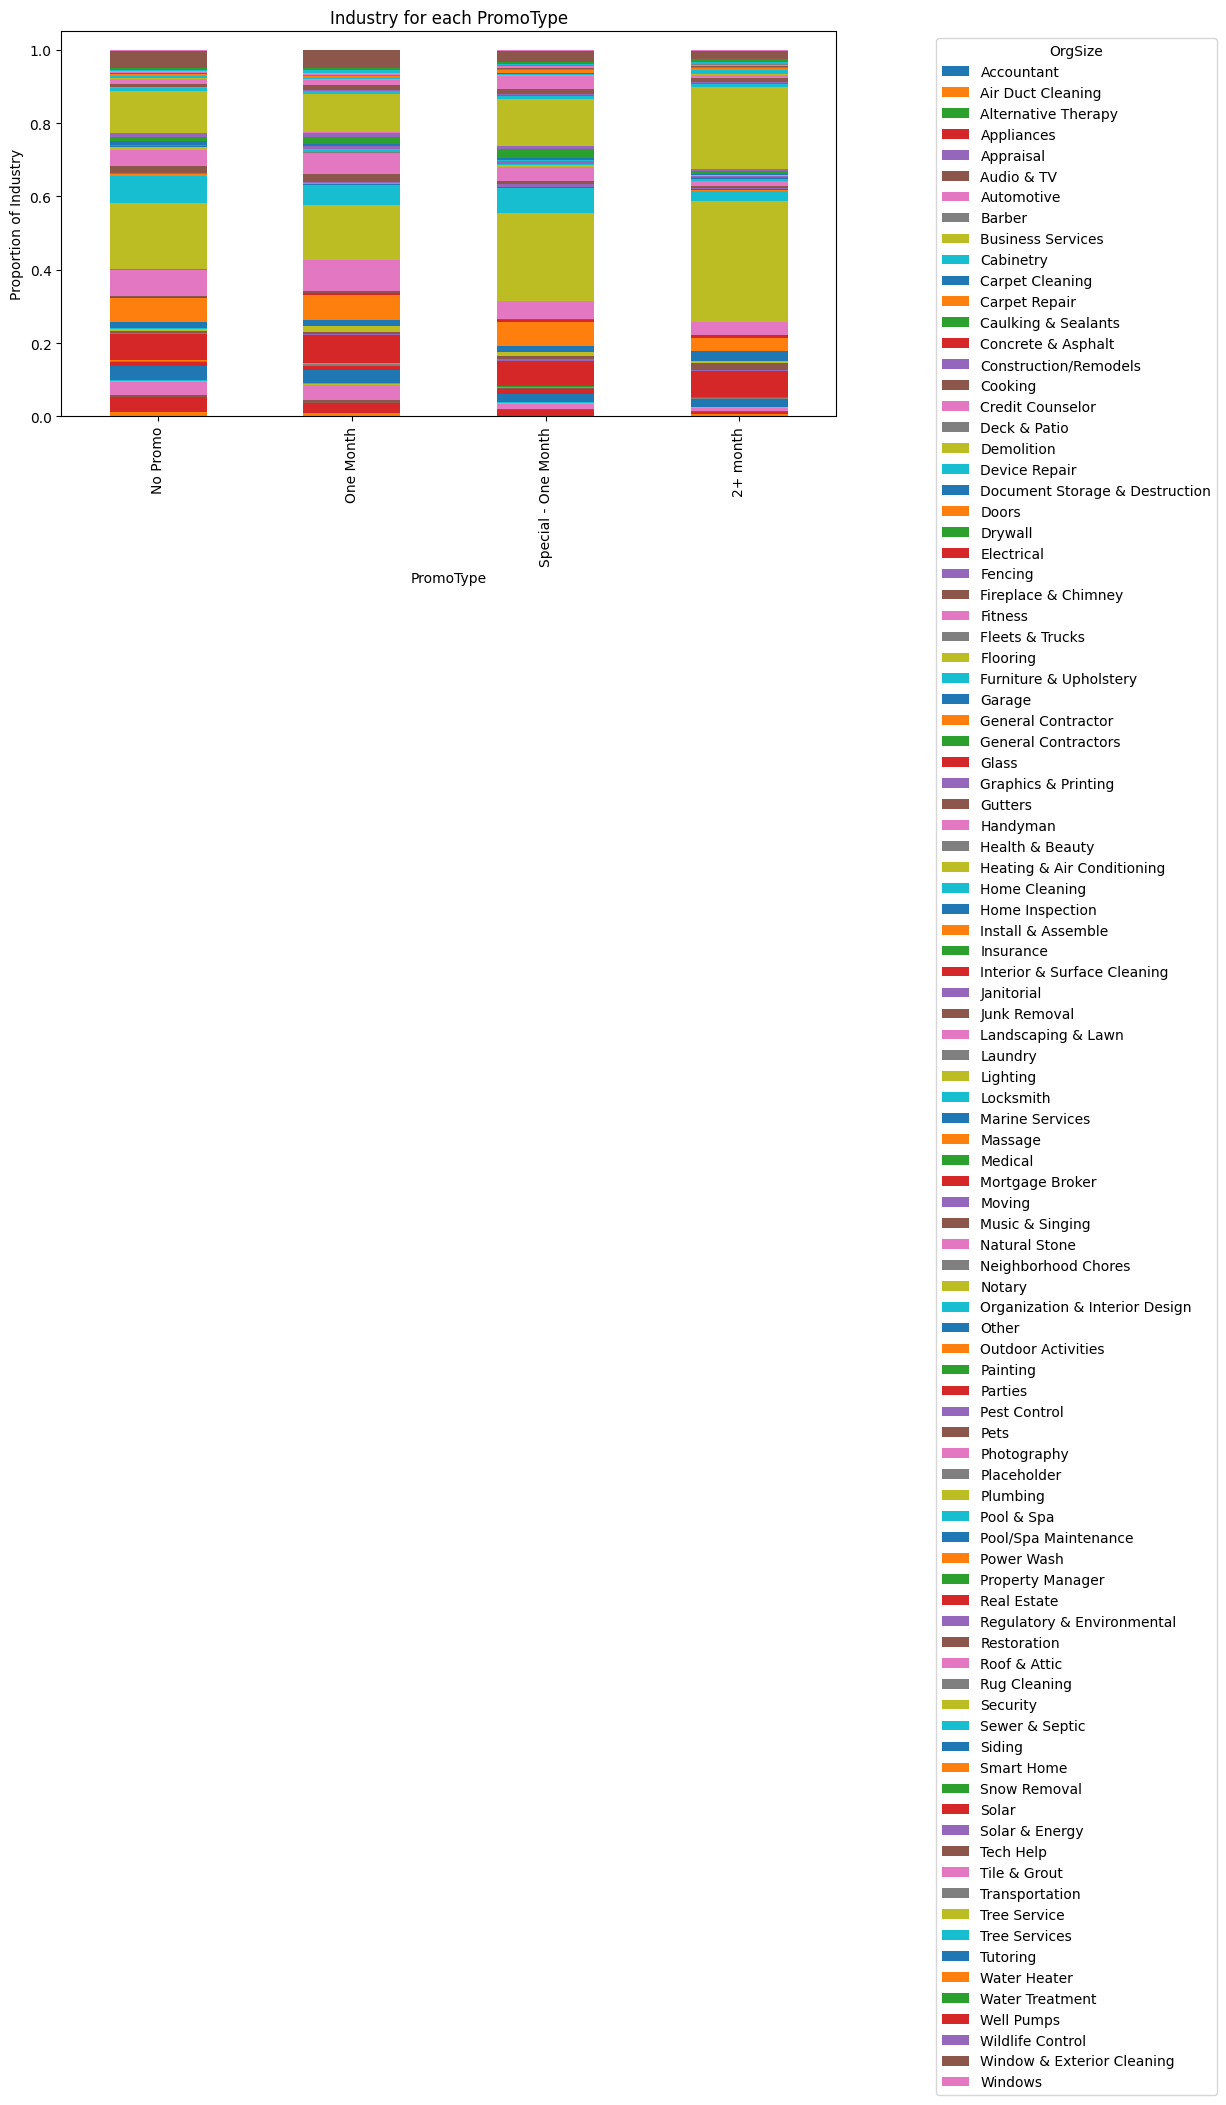

In [10]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Group by PromoType and OrgSize, count occurrences, and unstack for plotting
grouped = df[df['Industry'].notnull()].groupby(['PromoType', 'Industry']).size().unstack()

# Normalize the data to show proportions (optional)
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('Industry for each PromoType')
ax.set_ylabel('Proportion of Industry')  # Change to 'Count' if not normalizing
ax.set_xlabel('PromoType')

# Move the legend to a better location
ax.legend(title='OrgSize', loc='upper right', bbox_to_anchor=(1.5, 1))

# Display the plot
plt.tight_layout()
plt.show()

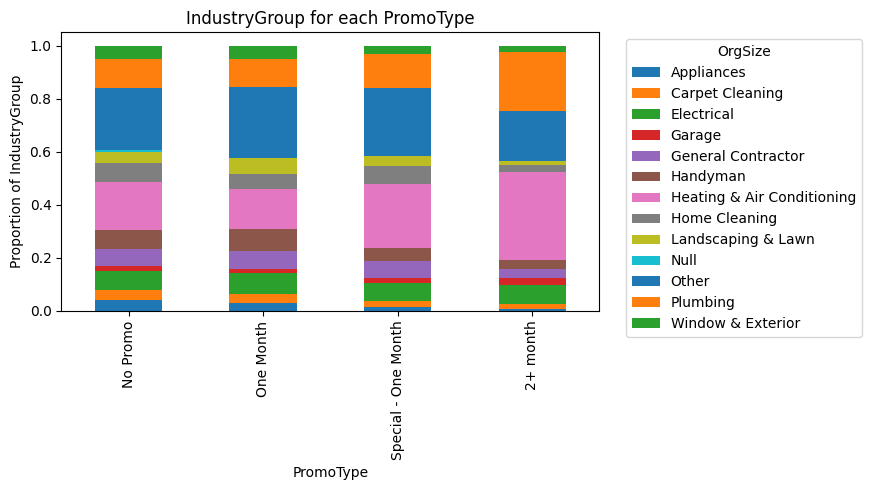

In [11]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Group by PromoType and OrgSize, count occurrences, and unstack for plotting
grouped = df[df['IndustryGroup'].notnull()].groupby(['PromoType', 'IndustryGroup']).size().unstack()

# Normalize the data to show proportions (optional)
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('IndustryGroup for each PromoType')
ax.set_ylabel('Proportion of IndustryGroup')  # Change to 'Count' if not normalizing
ax.set_xlabel('PromoType')

# Move the legend to a better location
ax.legend(title='OrgSize', loc='upper right', bbox_to_anchor=(1.5, 1))

# Display the plot
plt.tight_layout()
plt.show()

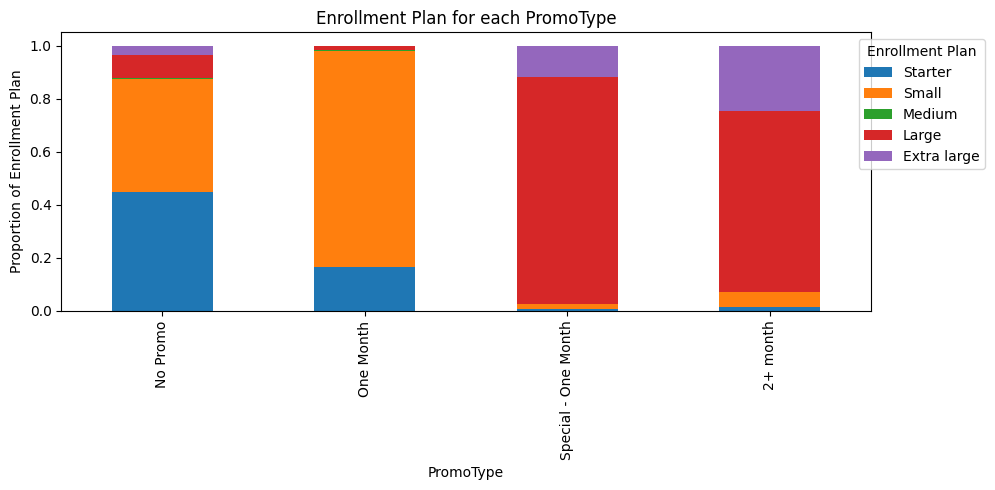

In [12]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Group by PromoType and OrgSize, count occurrences, and unstack for plotting
grouped = df[df['Enrollment Plan'].notnull()].groupby(['PromoType', 'Enrollment Plan']).size().unstack()

# Normalize the data to show proportions (optional)
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('Enrollment Plan for each PromoType')
ax.set_ylabel('Proportion of Enrollment Plan')  # Change to 'Count' if not normalizing
ax.set_xlabel('PromoType')

# Move the legend to a better location
ax.legend(title='Enrollment Plan', loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.tight_layout()
plt.show()

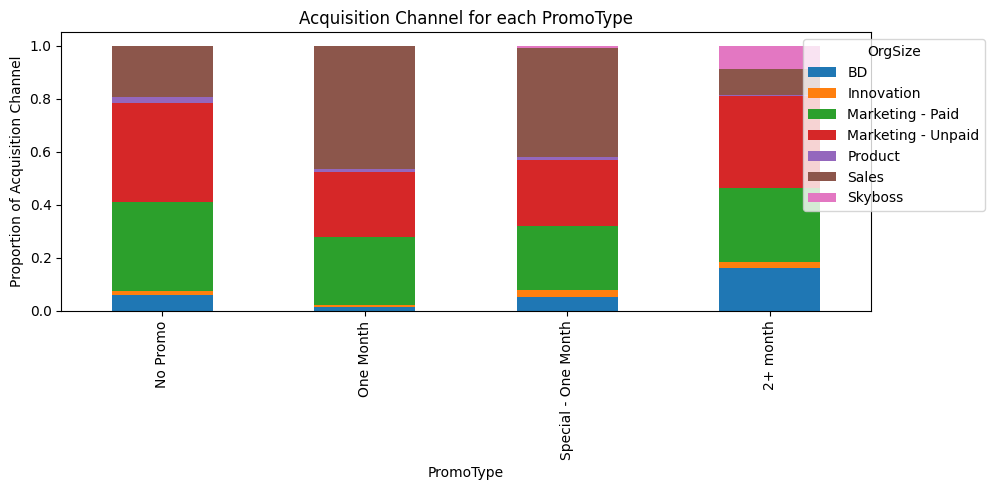

In [13]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Group by PromoType and OrgSize, count occurrences, and unstack for plotting
grouped = df[df['Acquisition Channel'].notnull()].groupby(['PromoType', 'Acquisition Channel']).size().unstack()

# Normalize the data to show proportions (optional)
grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, ax=ax)

# Set title and labels
ax.set_title('Acquisition Channel for each PromoType')
ax.set_ylabel('Proportion of Acquisition Channel')  # Change to 'Count' if not normalizing
ax.set_xlabel('PromoType')

# Move the legend to a better location
ax.legend(title='OrgSize', loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.tight_layout()
plt.show()

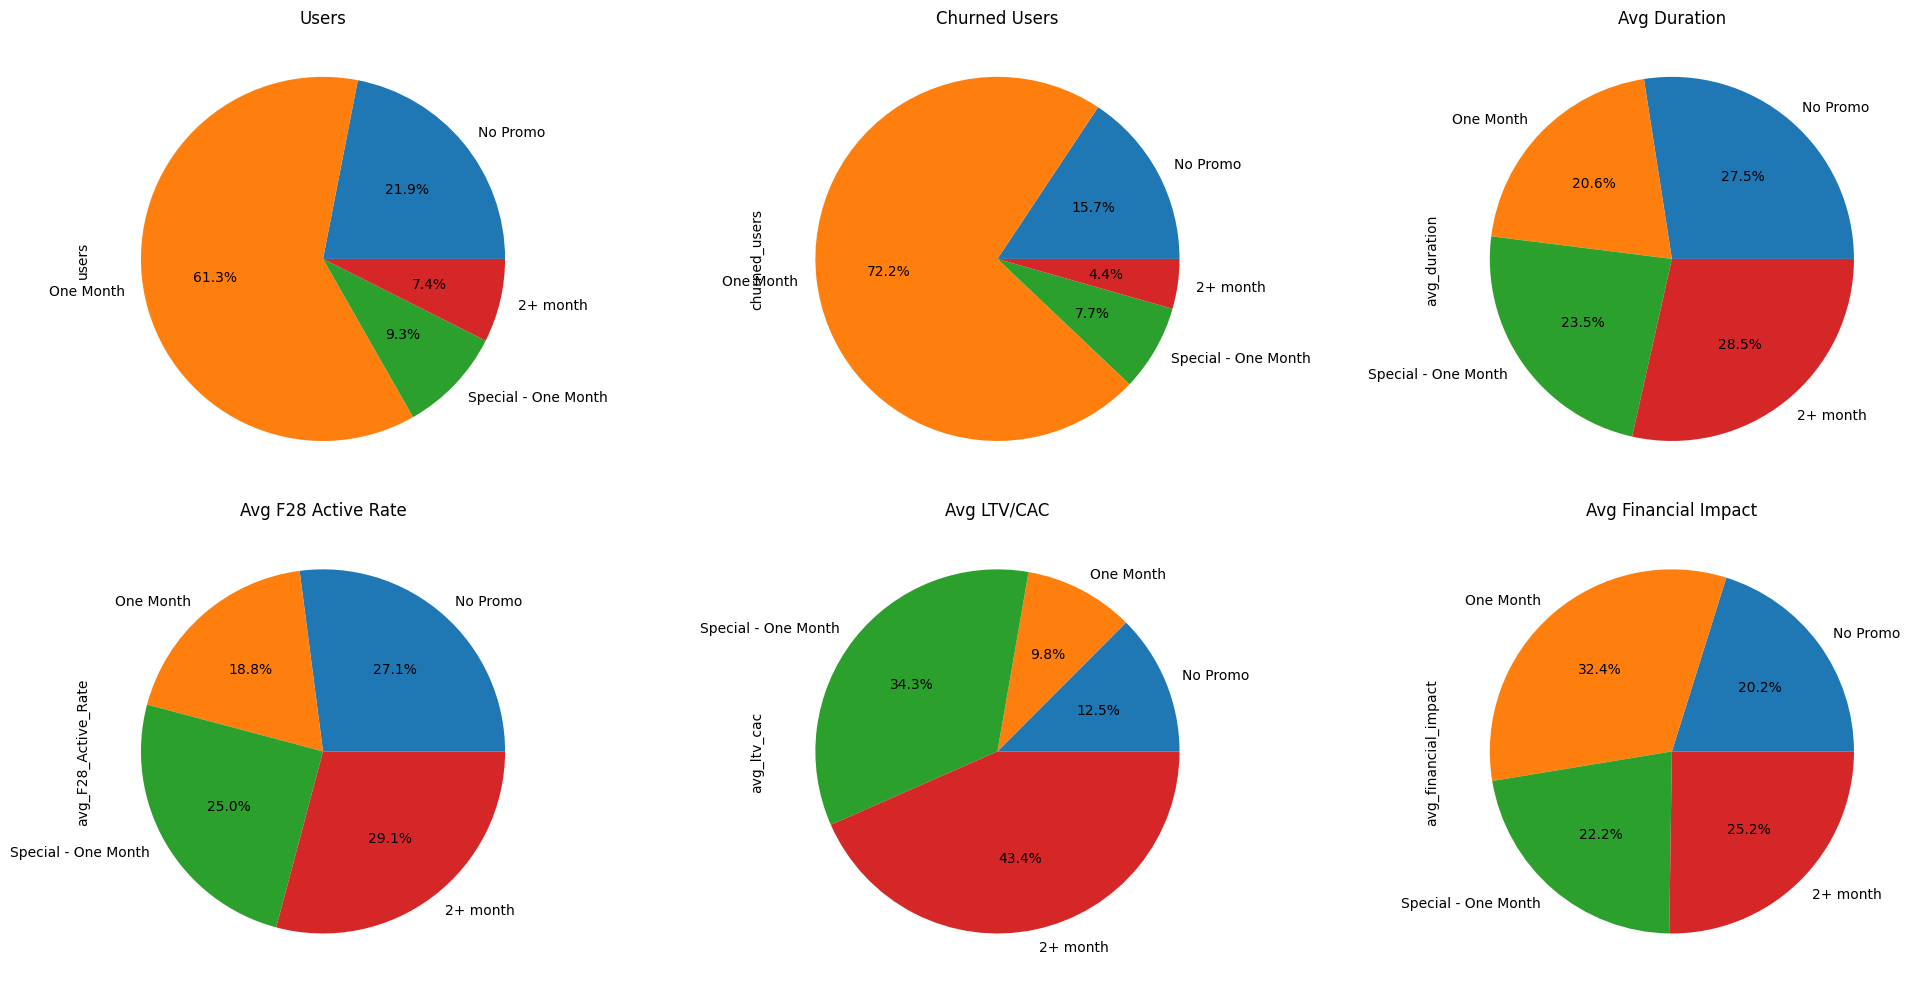

In [14]:
#subplot of the df_promo dataframe with 6 pie charts for: users, churned_users,avg_duration, avg_F28_Active_Rate, avg_ltv_cac, avg_financial_impact
fig, axs = plt.subplots(2,3, figsize=(20, 10))
df_promo['users'].plot.pie(ax=axs[0,0], autopct='%1.1f%%')
axs[0,0].set_title('Users')

df_promo['churned_users'].plot.pie(ax=axs[0,1], autopct='%1.1f%%')
axs[0,1].set_title('Churned Users')

df_promo['avg_duration'].plot.pie(ax=axs[0,2], autopct='%1.1f%%')
axs[0,2].set_title('Avg Duration')

df_promo['avg_F28_Active_Rate'].plot.pie(ax=axs[1,0], autopct='%1.1f%%')
axs[1,0].set_title('Avg F28 Active Rate')

df_promo['avg_ltv_cac'].plot.pie(ax=axs[1,1], autopct='%1.1f%%')
axs[1,1].set_title('Avg LTV/CAC')

df_promo['avg_financial_impact'].plot.pie(ax=axs[1,2], autopct='%1.1f%%')
axs[1,2].set_title('Avg Financial Impact')

plt.tight_layout()
plt.show()


In [15]:
#people are canceling their subscription to get a promotion
#people canceling their subscription to reduce their plan
#small number of users that are canceling their subscription to get a promotion, so we don't have to worry about this

df_filtered = df[df.groupby('OrgID')['OrgID'].transform('size') > 1]
#with pd.option_context("display.max_rows", 1000):
#    display(df_filtered)

#churned users that renewed for each promo type 
df_filtered[df_filtered['ChurnDate'].notnull()].groupby('PromoType')['PromoType'].count()

PromoType
No Promo               91
One Month              59
Special - One Month     9
2+ month               11
Name: PromoType, dtype: int64